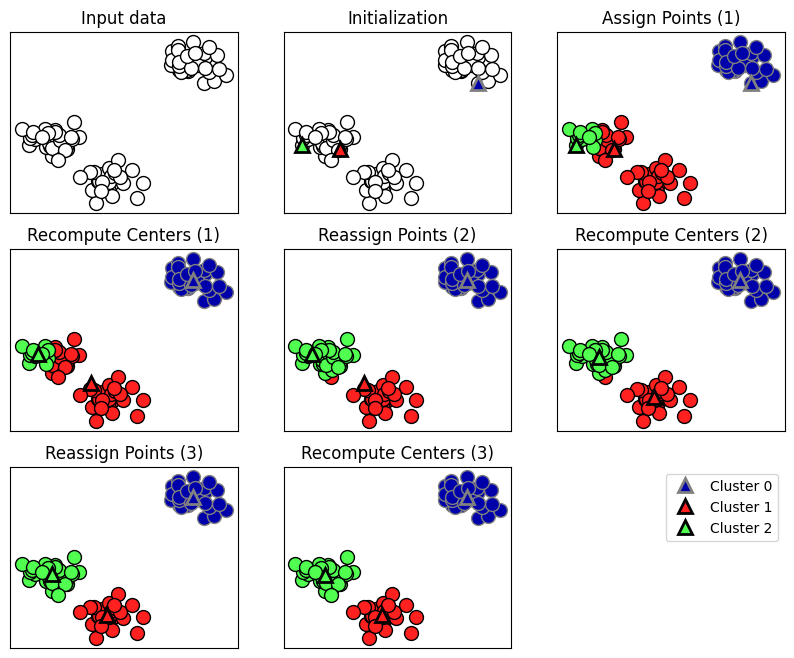

In [1]:
#개요
# kmeans 알고리즘에 대한 설명

import mglearn
mglearn.plots.plot_kmeans_algorithm()


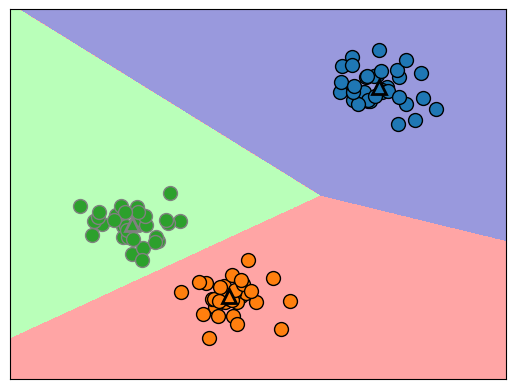

In [2]:
# kmeans 경계 표시

import matplotlib.pyplot as plt

mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [3]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

#2개의 클러스터로 구분
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
                #군집수
#모형이 분류한 라벨
print(kmeans.labels_)

#새로운 값에 대한 분류
X_new=np.array([[0, 0], [12, 3]])
print(kmeans.predict(X_new))

#중심좌표
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


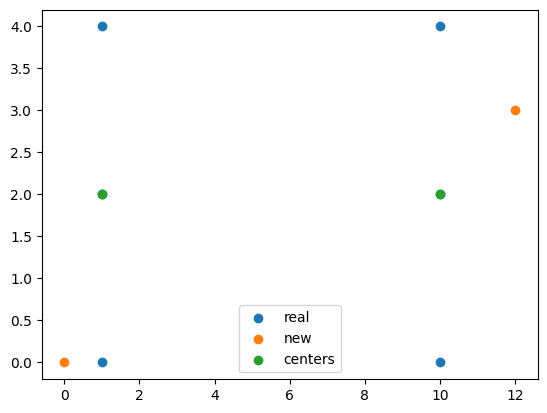

In [4]:
plt.scatter(X[:,0],X[:,1],label='real')
plt.scatter(X_new[:,0], X_new[:,1] ,label='new')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='centers')
plt.legend()
plt.show()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=1)

# 군집 모형 생성
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [6]:
# 모형이 분류한 값

lbl=model.labels_

lbl

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [7]:
#예측한 값

pred = model.predict(X)

print(pred)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [8]:
# 모델의 정확도

import sklearn.metrics as sm

sm.accuracy_score(y, pred)

0.0

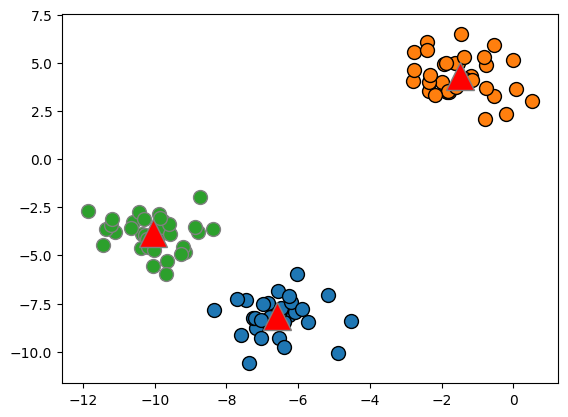

In [9]:
#3개의 클러스터를 산점도로 표현

mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers='o')

#centers
mglearn.discrete_scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', c='r', s=20)

plt.show()

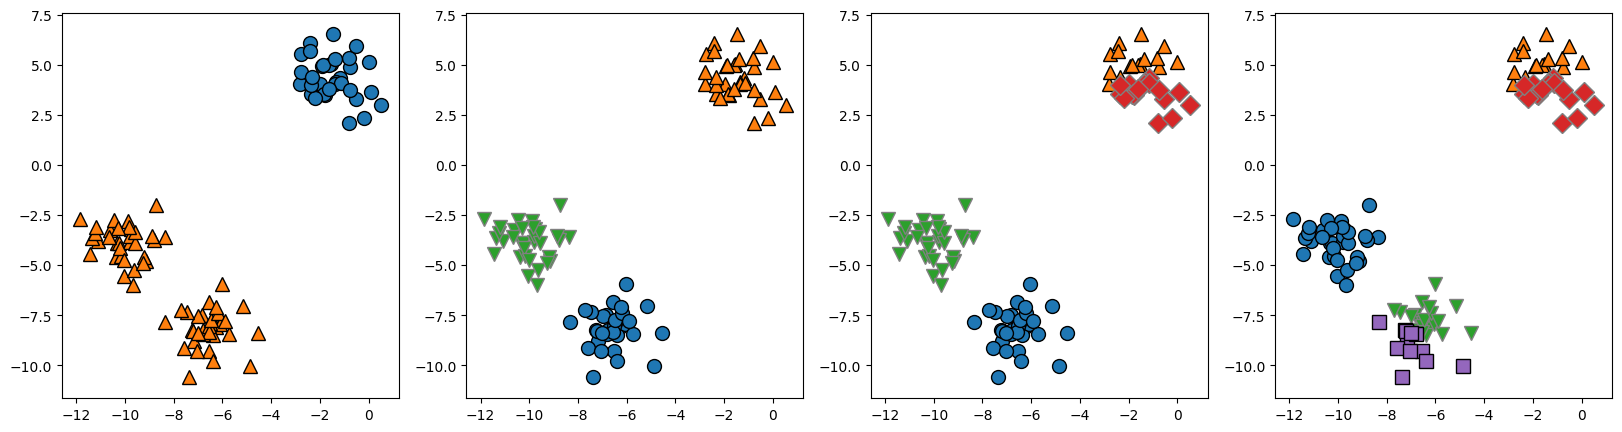

In [10]:
from matplotlib import pyplot as plt

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0

for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbls, ax=axes[idx])
    idx+=1

plt.show()

In [4]:
# 오존량 예측

import pandas as pd

# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


In [5]:
cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]

y = df['Result']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

Text(0.5, 0, 'number of clusters')

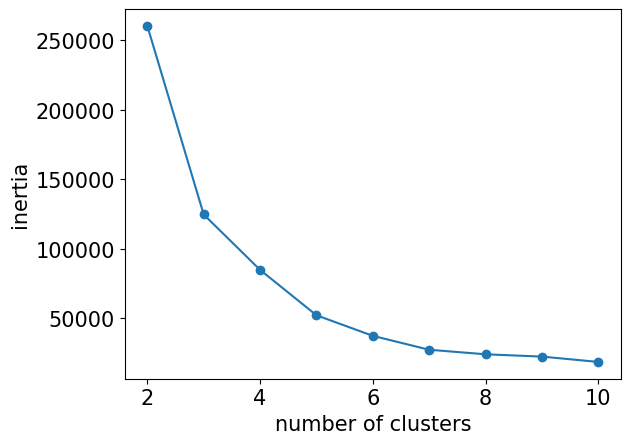

In [7]:
#최적의 클러스터 갯수를 구하는 방법
#inertia value : 군집화가 된 후 각 중심점에서 군집의 데이터간의 거리를 합산한 값
#작을수록 응집도가 높은 군집

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

clusters = range(2, 11)
inertias = []

for n in clusters:
    # 모델 생성
    model = KMeans(n_clusters=n,random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_)

plt.rcParams["font.size"]=15
plt.plot(clusters, inertias, "-o")
plt.ylabel("inertia")
plt.xlabel("number of clusters")

#엘보우(elbow) 기법
#inertias 값이 하강하다가 팔꿈치처럼 꺾이는 부분 3
#따라서 3개의 클러스터로 분류하는 것이 적절함

In [8]:
model = KMeans(n_clusters=3,random_state=10)
print(model)

pred=model.fit_predict(X_train)
print(pred[:5])

pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[1 2 0 2 0]
[0 0 1 0 2]


In [9]:
#군집화에서는 개별 라벨값보다는 군집이 중요함
#실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타냄
# ai : i와 같은 군집에 속한 원소들의 평균 거리
# bi : i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
# (bi - ai) / max(ai,bi)
# 실루엣계수가 클수록 좋은 모형
# 군집의 형상이 복잡하거나 크기의 차이가 많이 나면 비교가 어려운 단점이 있음

from sklearn.metrics import silhouette_score

silhouette_score(X_test, pred) #1에 가까울 수록 정확함

0.5558953549067654

In [10]:
#클러스터 갯수를 2로 설정

model = KMeans(n_clusters=2,random_state=10)
print(model)

pred=model.fit_predict(X_train)
print(pred[:5])

pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[1 0 0 0 0]
[0 0 1 0 0]


In [11]:
silhouette_score(X_test, pred)

0.6729790456272987

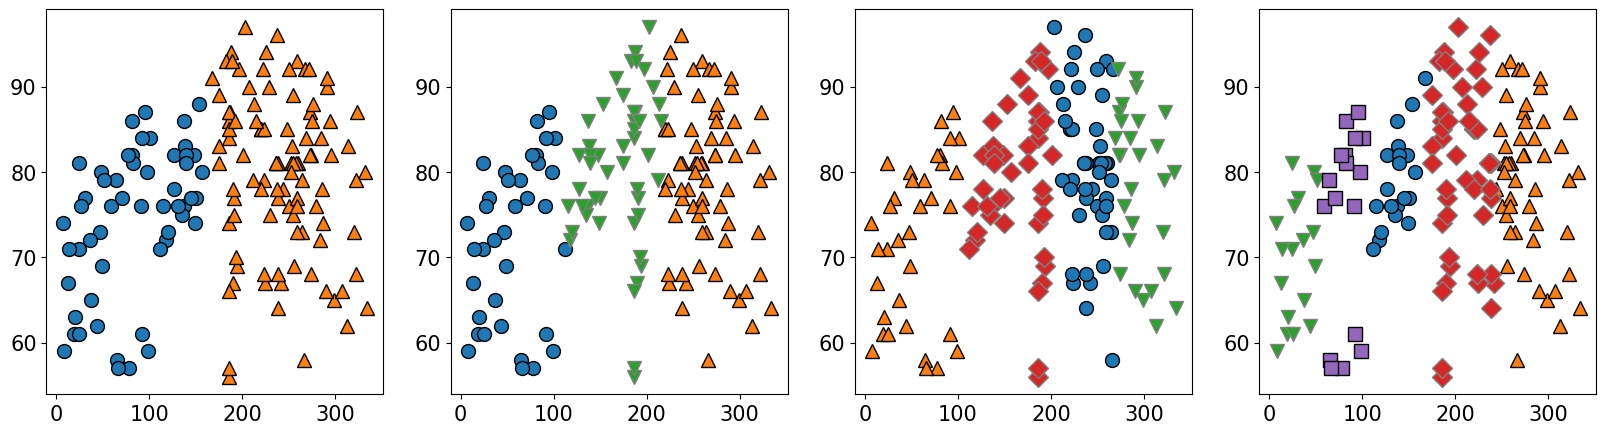

In [12]:
from matplotlib import pyplot as plt
import mglearn

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0

for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Solar.R"], X["Temp"], lbls, ax=axes[idx])
    idx+=1

In [18]:
#붓종 품종 분류

from sklearn import datasets

iris = datasets.load_iris()

In [19]:
import pandas as pd

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

df=pd.concat([X,y],axis=1)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


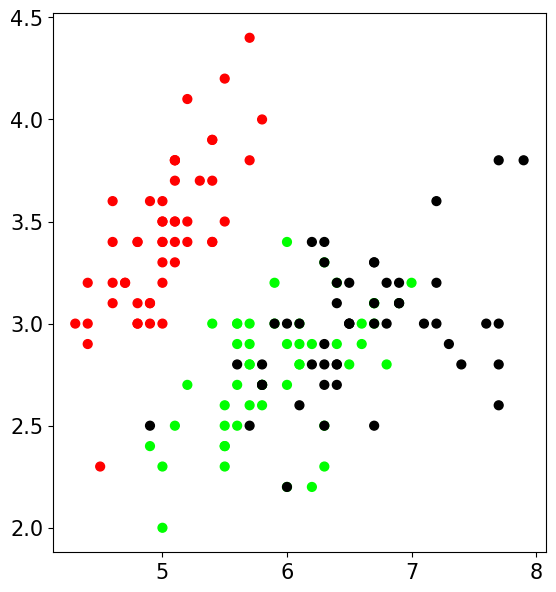

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 그래프 사이즈
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 꽃받침 기준 그래프
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[y.Targets], s=40)

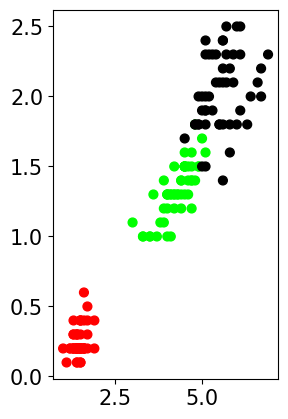

In [21]:
# 꽃잎 기준 그래프

plt.subplot(1, 2, 2) #1행 2열 2번
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)

In [22]:
# KMeans Cluster 모델 생성(클러스터 3개)

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,random_state=0)
model.fit(X)

KMeans(n_clusters=3, random_state=0)

In [23]:
# clustering 결과

model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

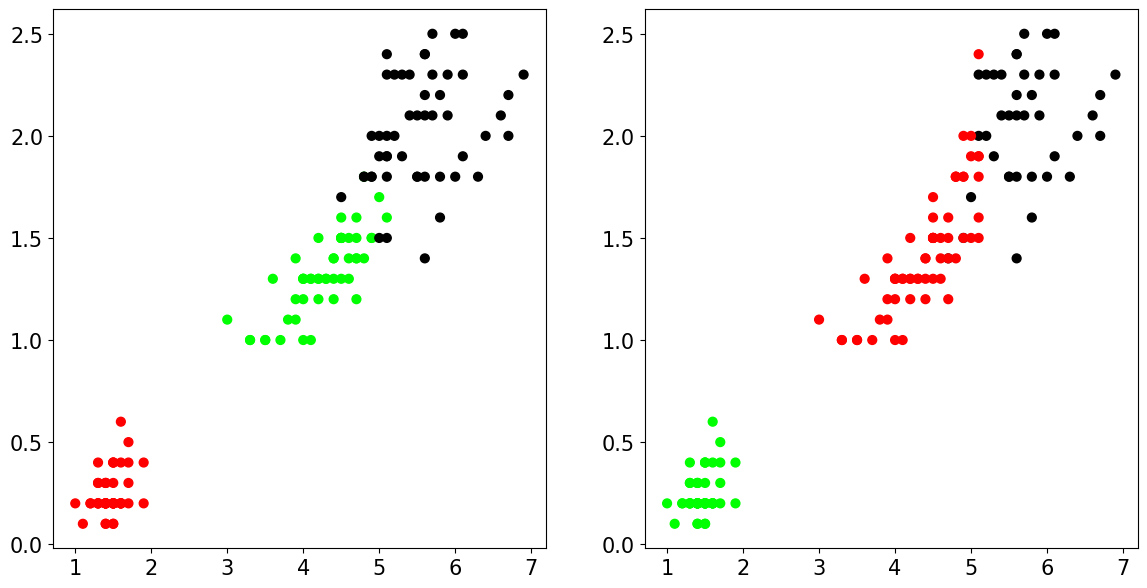

In [24]:
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)

# 그래프 출력(클러스터링)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)

# clustering은 비교적 잘 되었으나 색상이 다름(label이 다르게 매겨짐)
# kmeans 알고리즘은 정답을 미리 알려주지 않는 비지도학습
# 그룹이 잘 나누어지므로 라벨 번호는 중요하지 않음

In [25]:
# label 순번 변경
# [0,1,2]에서 [1,0,2]로 변경 ( 0과 1을 서로 바꿈 )

pred = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print(model.labels_)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


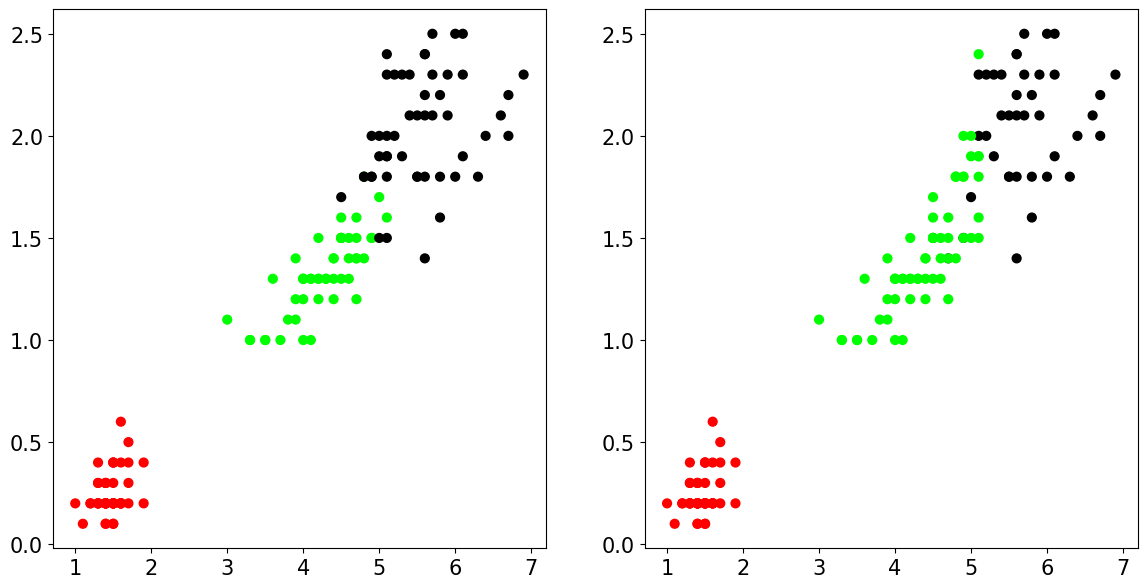

In [26]:
#두 그래프 색상위치 맞춤
# 그래프 사이즈 설정
plt.figure(figsize=(14,7))

# 색상 배열
colormap = np.array(['red', 'lime', 'black'])

# 그래프 출력(정답)
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)

# 그래프 출력(예측)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[pred], s=40)

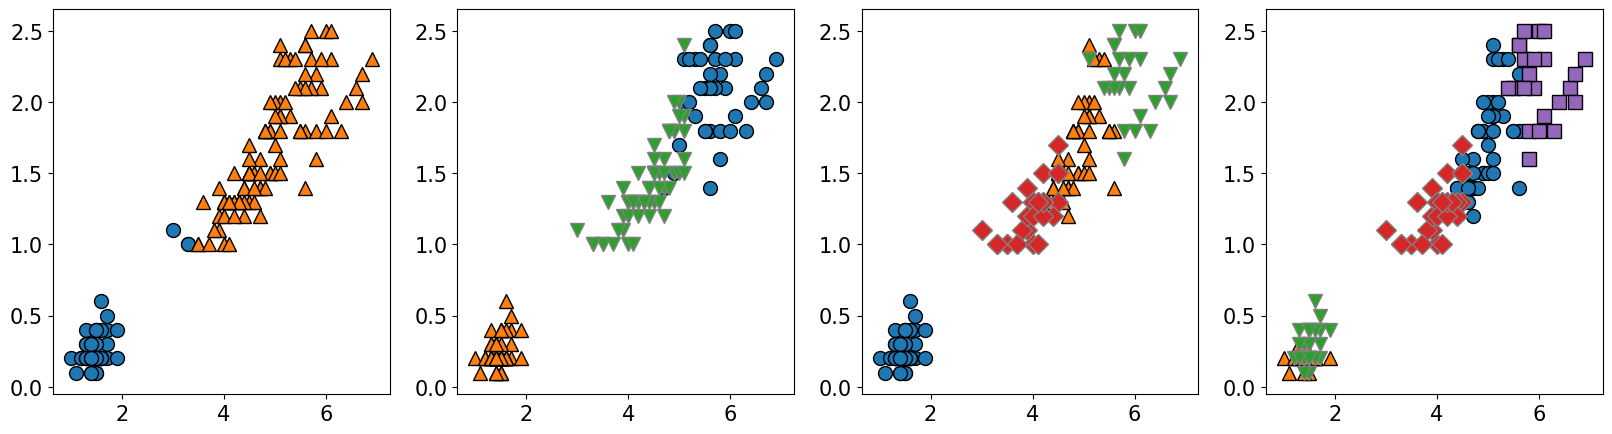

In [27]:
from matplotlib import pyplot as plt
import mglearn

#같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
#1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx=0

for k in [2,3,4,5]:

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X["Petal_Length"], X["Petal_Width"], lbls, ax=axes[idx])
    idx+=1

In [2]:
# k-means++

from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape # 샘플수 1797, 변수 64개 (8x8 픽셀)
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

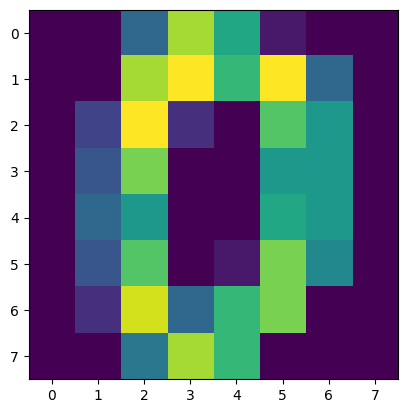

In [3]:
import matplotlib.pyplot as plt

plt.imshow(digits.data[0].reshape(8,8))

In [4]:
from sklearn.cluster import KMeans

# 비슷한 위치의 좌표들이 초기 중심좌표로 설정될 경우 불안정한 군집화 학습이 진행됨
# 최적의 초기 중심좌표들을 설정하려는 연구들이 많이 진행되었음
# 처음 1개의 좌표를 랜덤으로 선택
# 이후의 중심좌표는 이전에 선택한 중심좌표와의 거리를 계산하여 되도록 멀리 떨어진 좌표를 중심좌표로 선택
# k-means++ 기본값, random 랜덤으로 선택

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)

y_pred = model.labels_
print(model.cluster_centers_) #중심좌표

[[ 0.00000000e+00  9.22651934e-01  1.01104972e+01  1.44751381e+01
   7.86740331e+00  1.06077348e+00 -6.66133815e-16  0.00000000e+00
   2.20994475e-02  5.21546961e+00  1.36464088e+01  1.25856354e+01
   1.16464088e+01  3.37016575e+00  2.20994475e-02  0.00000000e+00
   1.10497238e-02  4.49723757e+00  8.08839779e+00  6.06629834e+00
   1.21049724e+01  3.71823204e+00  3.86740331e-02 -2.08166817e-17
  -2.16840434e-19  9.39226519e-01  2.81767956e+00  7.00000000e+00
   1.25138122e+01  2.76243094e+00  6.07734807e-02 -4.33680869e-19
   0.00000000e+00  4.41988950e-02  1.59668508e+00  9.86187845e+00
   1.08342541e+01  1.59668508e+00 -4.44089210e-16  0.00000000e+00
  -1.73472348e-18  2.43093923e-01  4.41988950e+00  1.11325967e+01
   7.75138122e+00  2.60220994e+00  9.39226519e-01  1.10497238e-02
   3.46944695e-18  1.18232044e+00  1.08950276e+01  1.36298343e+01
   1.18618785e+01  1.12486188e+01  7.60220994e+00  1.09392265e+00
  -1.08420217e-19  9.17127072e-01  1.03093923e+01  1.45027624e+01
   1.35082

In [5]:
import matplotlib.pyplot as plt

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0

    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

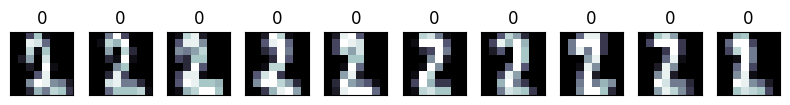

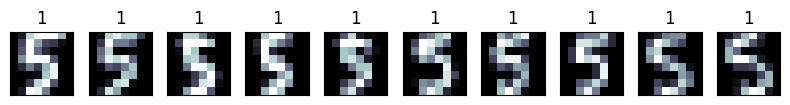

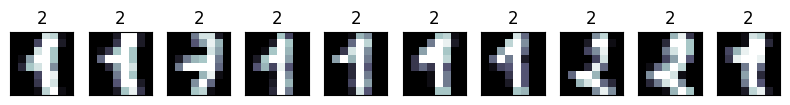

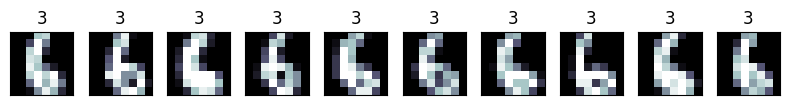

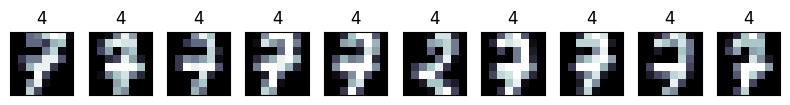

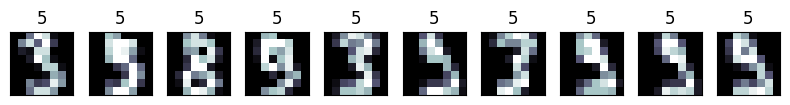

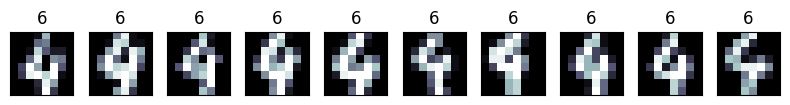

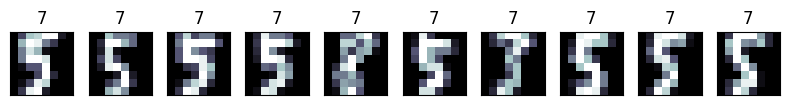

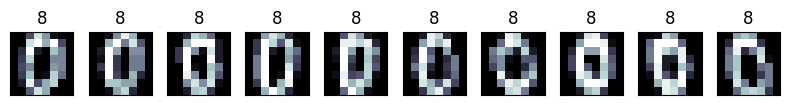

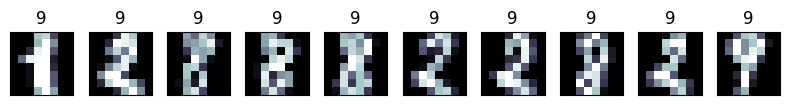

In [6]:
for i in range(10):
    show_cluster(digits.images, y_pred, i)

#이미지 위의 숫자는 군집 번호이므로 실제 번호와 일치하지 않음 

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  0,   0,   0,   0,   0,   0,   1,   0, 177,   0],
       [ 25,   0,  55,   2,   0,   0,   0,   1,   0,  99],
       [151,   0,   2,   0,   3,  12,   0,   0,   1,   8],
       [  1,   3,   0,   0,   6, 163,   0,   2,   0,   8],
       [  0,   0,   5,   0,   8,   0, 164,   1,   0,   3],
       [  0, 103,   0,   1,   0,   5,   1,  72,   0,   0],
       [  0,   0,   1, 177,   0,   0,   0,   0,   1,   2],
       [  0,   0,   2,   0, 175,   0,   0,   0,   0,   2],
       [  4,   1,   6,   2,   6,  48,   0,   6,   1, 100],
       [  0,   1,  21,   0,   8, 144,   0,   4,   0,   2]], dtype=int64)

In [8]:
from sklearn.metrics.cluster import silhouette_score

silhouette_score(digits.data, y_pred)

0.18555026309037873

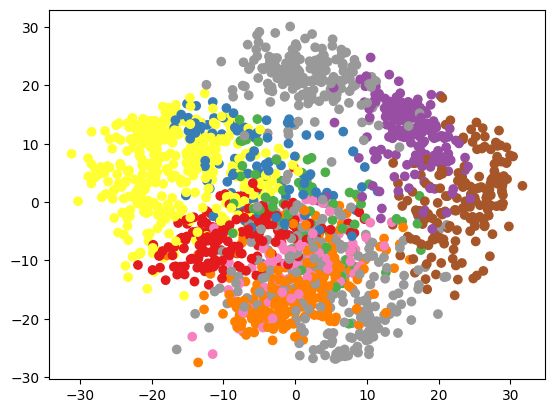

In [9]:
#군집화 결과를 주성분 분석을 통해 그린 그래프

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = pca.fit_transform(digits.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)

plt.show()
#분류가 잘 안되어있음